In [101]:
cd /content/drive/MyDrive/NoteAuth

/content/drive/MyDrive/NoteAuth


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# Preparing Data

In [103]:
data=pd.read_csv('dataset.txt',header=None)

In [104]:
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [105]:
features=data.iloc[:,:4]
labels=data.iloc[:,-1]

In [106]:
features=np.array(features)
labels=np.array(labels)

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=42)

In [108]:
# Convert features and labels to tensors
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [109]:
x_train.shape

torch.Size([1097, 4])

In [110]:
y_train.shape

torch.Size([1097])

# Model Part

In [113]:
import torch
import torch.nn as nn
import torch.nn.functional as nf

class ANNModel(nn.Module):
  def __init__(self,input_features=4,hidden1=8,hidden2=16,out_features=2):
    super().__init__()
    self.fc1=nn.Linear(input_features,hidden1)
    self.fc2=nn.Linear(hidden1,hidden2)
    self.out=nn.Linear(hidden2,out_features)
  def forward(self,x):
    x=nf.relu(self.fc1(x))
    x=nf.relu(self.fc2(x))
    x=nf.softmax(self.out(x))
    return x


In [114]:
model=ANNModel()

In [115]:
model

ANNModel(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=2, bias=True)
)

In [116]:
model.parameters

<bound method Module.parameters of ANNModel(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=2, bias=True)
)>

In [117]:
loss_function=nn.CrossEntropyLoss()

In [118]:
adam=torch.optim.Adam(model.parameters())

In [119]:
adam

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

# Training Model

In [120]:
losses=[]

In [121]:
epochs=1000
for i in range(epochs):
  i=i+1
  print("Epoch Count",i,end=" ")
  adam.zero_grad()
  output=model(x_train)
  loss=loss_function(output,y_train)
  print("Loss is",loss.item())
  losses.append(loss)
  loss.backward()
  adam.step()


Epoch Count 1 Loss is 0.6724733710289001
Epoch Count 2 Loss is 0.67118901014328
Epoch Count 3 Loss is 0.6699056625366211
Epoch Count 4 Loss is 0.6686253547668457
Epoch Count 5 Loss is 0.6673463582992554
Epoch Count 6 Loss is 0.6660683155059814
Epoch Count 7 Loss is 0.6647933125495911
Epoch Count 8 Loss is 0.663518488407135
Epoch Count 9 Loss is 0.6622447371482849
Epoch Count 10 Loss is 0.6609746813774109
Epoch Count 11 Loss is 0.6597084999084473
Epoch Count 12 Loss is 0.6584440469741821
Epoch Count 13 Loss is 0.6571829319000244
Epoch Count 14 Loss is 0.6559249758720398
Epoch Count 15 Loss is 0.6546697616577148
Epoch Count 16 Loss is 0.6534114480018616
Epoch Count 17 Loss is 0.6521512269973755
Epoch Count 18 Loss is 0.6508879661560059
Epoch Count 19 Loss is 0.6496210694313049
Epoch Count 20 Loss is 0.6483507752418518
Epoch Count 21 Loss is 0.6470763087272644
Epoch Count 22 Loss is 0.6457977890968323
Epoch Count 23 Loss is 0.6445152759552002
Epoch Count 24 Loss is 0.6432257890701294
Epoc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Epoch Count 64 Loss is 0.5857968926429749
Epoch Count 65 Loss is 0.5842767953872681
Epoch Count 66 Loss is 0.5827592611312866
Epoch Count 67 Loss is 0.58124178647995
Epoch Count 68 Loss is 0.579727828502655
Epoch Count 69 Loss is 0.5782142281532288
Epoch Count 70 Loss is 0.5767003297805786
Epoch Count 71 Loss is 0.5751844048500061
Epoch Count 72 Loss is 0.5736716985702515
Epoch Count 73 Loss is 0.5721558928489685
Epoch Count 74 Loss is 0.5706369280815125
Epoch Count 75 Loss is 0.5691149234771729
Epoch Count 76 Loss is 0.5675926804542542
Epoch Count 77 Loss is 0.5660629272460938
Epoch Count 78 Loss is 0.5645276308059692
Epoch Count 79 Loss is 0.562988817691803
Epoch Count 80 Loss is 0.5614402294158936
Epoch Count 81 Loss is 0.5598799586296082
Epoch Count 82 Loss is 0.5583139657974243
Epoch Count 83 Loss is 0.5567352771759033
Epoch Count 84 Loss is 0.5551348328590393
Epoch Count 85 Loss is 0.5535208582878113
Epoch Count 86 Loss is 0.5518937706947327
Epoch Count 87 Loss is 0.5502514839172

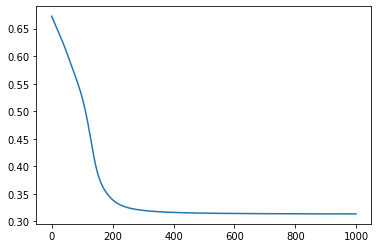

In [122]:
plt.plot(np.arange(1000),losses)

# Training Accuracy

In [123]:
import sklearn.metrics as m

In [126]:
with torch.no_grad():
  train_pred=model(x_train)
  train_pred=torch.argmax(train_pred,dim=1)

m.accuracy_score(y_train,train_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


1.0

# Model Prediciton

In [127]:
with torch.no_grad():
  test_pred=model(x_test)
  test_pred=torch.argmax(test_pred,dim=1)

m.accuracy_score(y_test,test_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


1.0

In [130]:
m.confusion_matrix(y_test,test_pred)

array([[148,   0],
       [  0, 127]])

In [132]:
print(m.classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



# Saving a Model

In [133]:
torch.save(model,'modelann.pt')

# Loading a Model

In [134]:
ANN=torch.load('modelann.pt')

In [135]:
ANN

ANNModel(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=2, bias=True)
)

# Inference

In [144]:
x=[13.60,11.661,-6.8073,34]

In [145]:
x=torch.FloatTensor(x)

In [146]:
with torch.no_grad():
  y=ANN(x)
  y=torch.argmax(y)
  y=y.item()
  print("Predicted Value is",y)

Predicted Value is 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  
